<a href="https://colab.research.google.com/github/keshan200/Mushroom_Dataset_Classification/blob/main/MushroomDataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
od.download("https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: keshansilva
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset


100%|██████████| 602k/602k [00:00<00:00, 1.01MB/s]

In [ ]:
data = pd.read_csv("/content/mushroom-dataset/mushroom_cleaned.csv")

In [ ]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
data.shape

(54035, 9)

In [ ]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [ ]:
x = data.drop(["class"],axis=1)
y = data["class"]

In [ ]:
print(x.dtypes)


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
dtype: object


In [ ]:
print(x.dtypes)


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
dtype: object


In [ ]:
#data normalize

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)

In [ ]:
print(x.dtypes)

Soil_Type           int64
Sunlight_Hours    float64
Temperature       float64
Humidity          float64
dtype: object


In [ ]:
y.shape
print(y.dtypes)

int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
x_test.shape,x_train.shape

((13509, 8), (40526, 8))

In [ ]:
x_test[:5]



,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
39159,847,6,0,7,0.859036,1534,11,0.888450
2445,514,6,2,10,2.462568,1080,6,0.943195
47400,882,6,4,11,0.823225,1276,6,0.888450
25249,846,5,6,5,0.393494,2044,11,0.888450
23994,1534,6,0,4,0.488990,2243,11,0.943195


# Model Building

In [ ]:
#create model

model = tf.keras.Sequential([
    #Hidden Layer
    tf.keras.layers.Dense(4,activation='relu',input_shape=(8,)),

      tf.keras.layers.Dense(120,activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(48,activation='relu'),
      tf.keras.layers.Dense(48,activation='relu'),
      tf.keras.layers.Dense(45,activation='relu'),
      tf.keras.layers.Dense(48,activation='relu'),
      tf.keras.layers.Dense(38,activation='relu'),
      tf.keras.layers.Dropout(0.2),


    #Output Layer
    tf.keras.layers.Dense(2,activation='softmax')
])



#compile model

model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)


#train model

hs=model.fit(x_train,y_train,epochs = 200,batch_size=150)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.5684 - loss: 0.6752
Epoch 2/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6563 - loss: 0.6126
Epoch 3/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6847 - loss: 0.5865
Epoch 4/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7008 - loss: 0.5698
Epoch 5/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.5474
Epoch 6/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7212 - loss: 0.5275
Epoch 7/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7369 - loss: 0.5110
Epoch 8/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7420 - loss: 0.4945
Epoch 9/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - loss: 0.4791
Epoch 10/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.4579
Epoch 11/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.4430
Epoch 12/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [ ]:
model.evaluate(x_test,y_test)

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9544 - loss: 0.1151


[0.11187709122896194, 0.956621527671814]

In [ ]:
y_pred =model.predict(x_test)
y_pred[:5]

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.82760835, 0.17239156],
       [0.06102636, 0.9389736 ],
       [0.12213081, 0.8778692 ],
       [0.14189886, 0.8581011 ],
       [0.01377819, 0.98622173]], dtype=float32)

<Axes: >

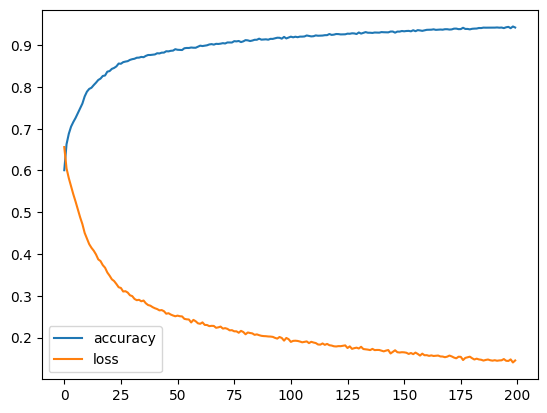

In [ ]:
pd.DataFrame(hs.history).plot()